#Задание

**Цель:**  
применить на практике методы по оценке качества данных.
**Описание задания:**.
В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по [ссылке](https://www.kaggle.com/hesh97/titanicdataset-traincsv) или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd # Для работы с данными
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### 1. Загрузка данных

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
california_housing = fetch_california_housing(as_frame=True)

In [ ]:
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
california_housing.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [ ]:
california_housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
data = california_housing.frame
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


#### 2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


пропусков нет

мы видим, что у данных 8 признаков,

MedHouseVal - целевая переменная
все значения вещественные,

всего 20640 записей

In [ ]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


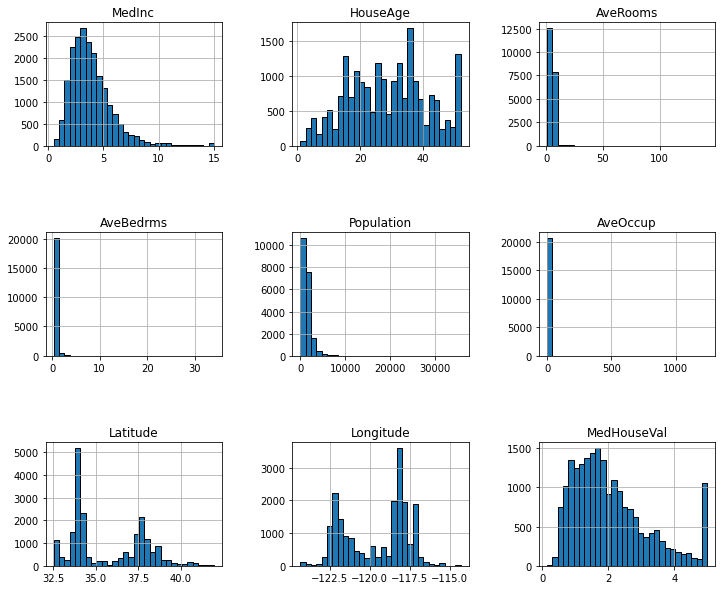

In [ ]:
import matplotlib.pyplot as plt

# распределение данных по каждому признаку
data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

#### 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

In [ ]:
X = data[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = data['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [ ]:
# инициализация модели
model = LinearRegression()

In [ ]:
# обучение
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# полученные предсказания
predict = model.predict(X_test)

In [ ]:
predict

array([0.71912284, 1.76401657, 2.70965883, ..., 4.46877017, 1.18751119,
       2.00940251])

In [ ]:
model.score(X_train, y_train)

0.6125511913966952

In [ ]:
model.score(X_test, y_test)

0.575787706032451

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# расчет метрики RMSE
rmse_start = np.sqrt(mean_squared_error(y_test, predict))
rmse_start

0.7455813830127763

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# расчет метрики R2
r2_start = r2_score(y_test, predict)
r2_start

0.575787706032451

#### 5.Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

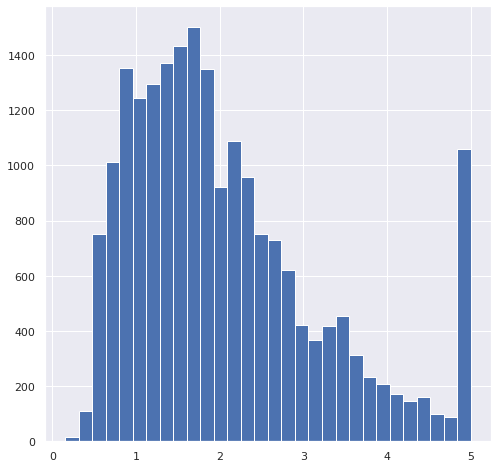

In [ ]:
data['MedHouseVal'].hist(figsize=(8, 8), bins=30)

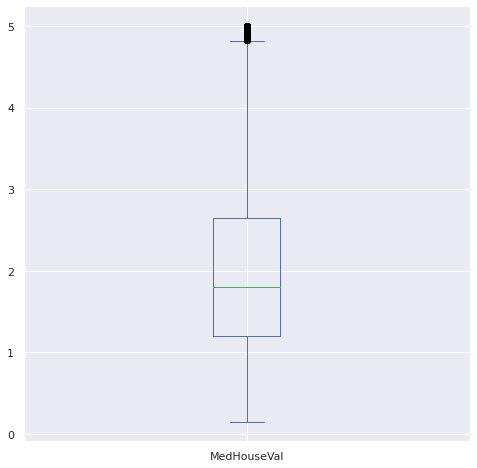

In [ ]:
data['MedHouseVal'].plot(figsize=(8, 8), kind='box', )

Распределение с длинным хвостом вправо, есть пороговое значение 5

### 6.Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
* a. Сделайте выводы.
* b. Удалите признаки на основании полученных значений, выводов.
* c. Повторите п. 3, п. 4 на измененных данных.

In [ ]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [ ]:
# удобно визуализировать при помощи тепловой карты
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr(), annot=True)

NameError: name 'sns' is not defined

In [ ]:
def get_pairplot(X, columns=None):
    if columns is None:
        columns = list(X.columns)
    sns.pairplot(X[columns])
    pass

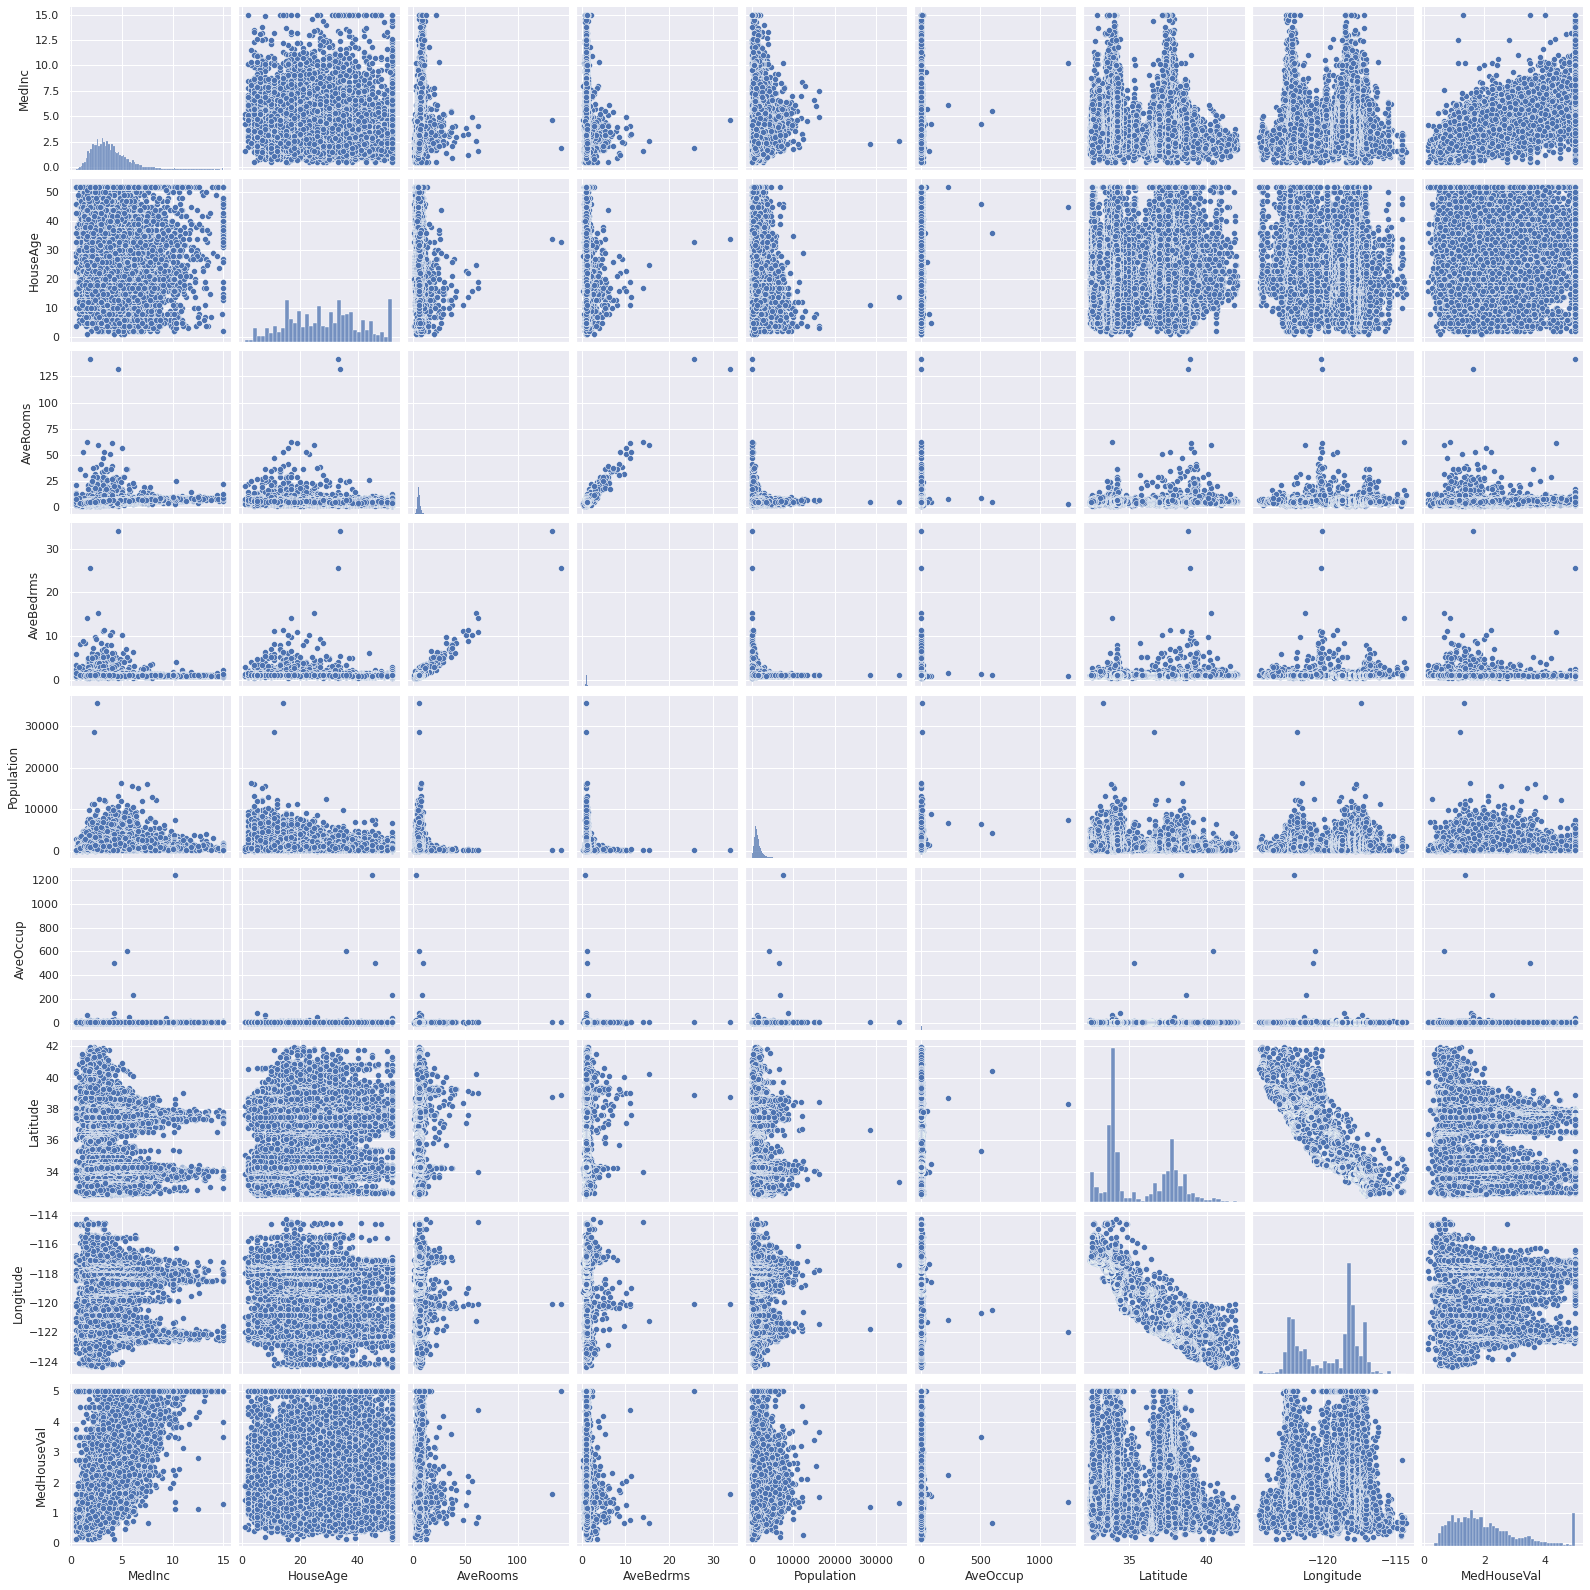

In [ ]:
 get_pairplot(data)

ВЫВОДЫ: коррелируют признаки AveBedrms и AveRooms, Latitude и Longitude

признак Medinc (доход) сильно коррелирует с таргетом


In [ ]:
data.plot(kind='scatter', x='AveBedrms', y='AveRooms')

NameError: name 'data' is not defined

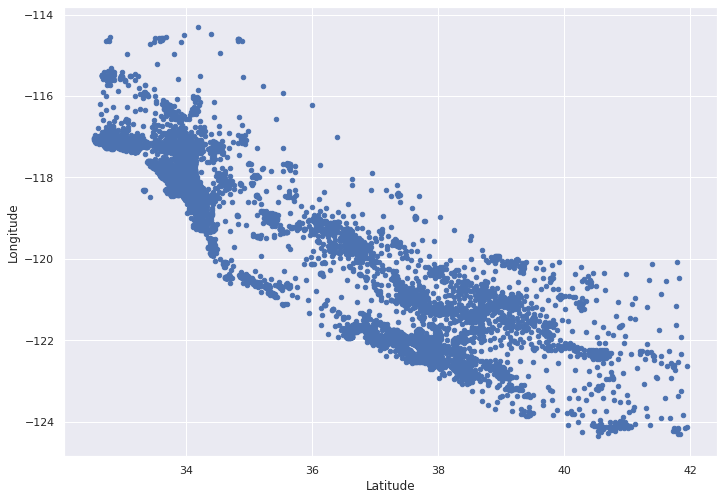

In [ ]:
data.plot(kind='scatter', x='Latitude', y='Longitude')

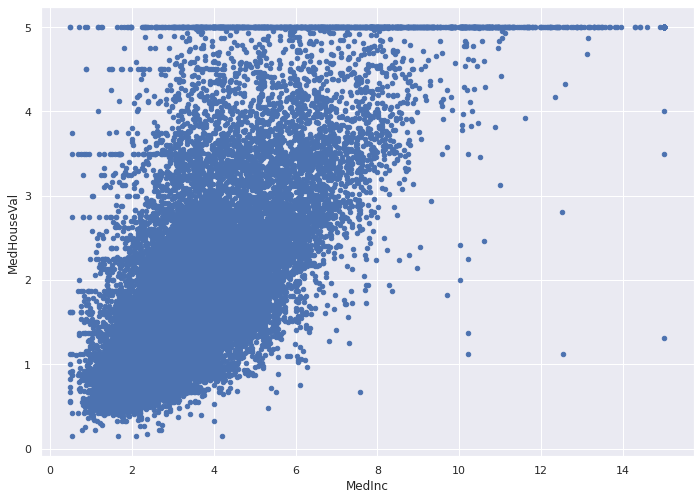

In [ ]:
data.plot(kind='scatter', x='MedInc', y='MedHouseVal')

In [ ]:
# удаляем широту и долготу, удаляем, кол-во спальней (AveBedrms)

In [ ]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [ ]:
data_new = data.drop(columns = ['AveBedrms', 'Latitude', 'Longitude'])

In [ ]:
data_new

,MedInc,HouseAge,AveRooms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,0.847


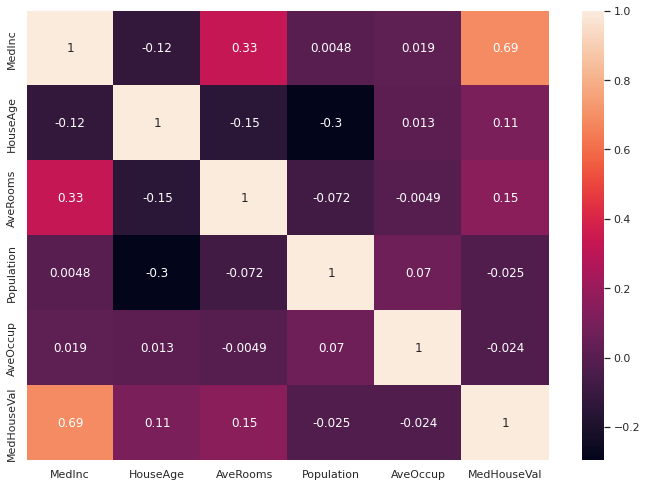

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data_new.corr(), annot=True)

In [ ]:
# повторное обучение

In [ ]:
X = data_new[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup']]
y = data_new['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
predict = model.predict(X_test)

#####метрики после удаления коррелирующих столбцов:

In [ ]:
model.score(X_train, y_train)

0.5180634208454455

In [ ]:
model.score(X_test, y_test)

0.49928842969300247

In [ ]:
rmse_corr = np.sqrt(mean_squared_error(y_test, predict))
rmse_corr

0.8100228004441535

In [ ]:
r2_corr = r2_score(y_test, predict)
r2_corr

0.49928842969300247

ВЫВОД: Метрика RMSE улучшилась, метрика R2 ухудшилась

### 7.Исследуйте оставленные признаки на выбросы.
* a. Удалите выбросы в случае обнаружения.
* b. Повторите п. 3, п. 4 на измененных данных.

In [ ]:
data_new.describe()

,MedInc,HouseAge,AveRooms,Population,AveOccup,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1425.476744,3.070655,2.068558
std,1.899822,12.585558,2.474173,1132.462122,10.386050,1.153956
min,0.499900,1.000000,0.846154,3.000000,0.692308,0.149990
25%,2.563400,18.000000,4.440716,787.000000,2.429741,1.196000
50%,3.534800,29.000000,5.229129,1166.000000,2.818116,1.797000
75%,4.743250,37.000000,6.052381,1725.000000,3.282261,2.647250
max,15.000100,52.000000,141.909091,35682.000000,1243.333333,5.000010


In [ ]:
def get_boxplot(X, columns=[]):
    for i in columns:
        sns.boxplot(x=X[i])
    pass


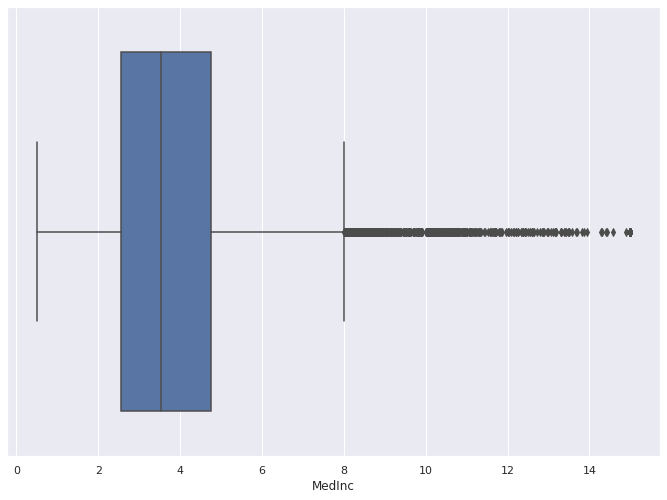

In [ ]:
get_boxplot(data_new, columns=['MedInc'])

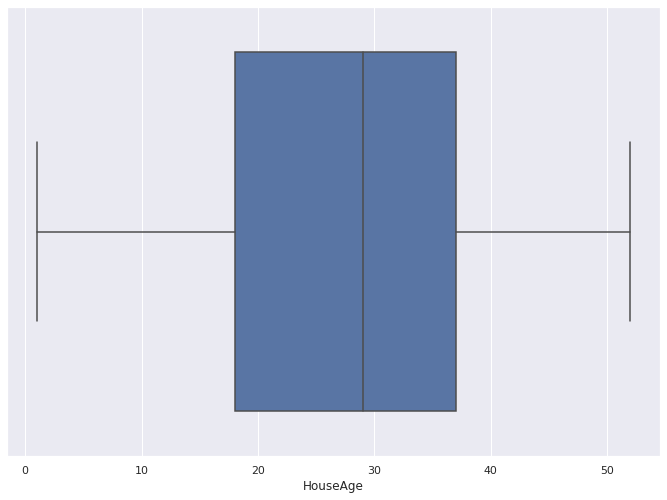

In [ ]:
get_boxplot(data_new, columns=['HouseAge'])

эти два признака (MedInc, HouseAge) принимаю как признаки без выбросов

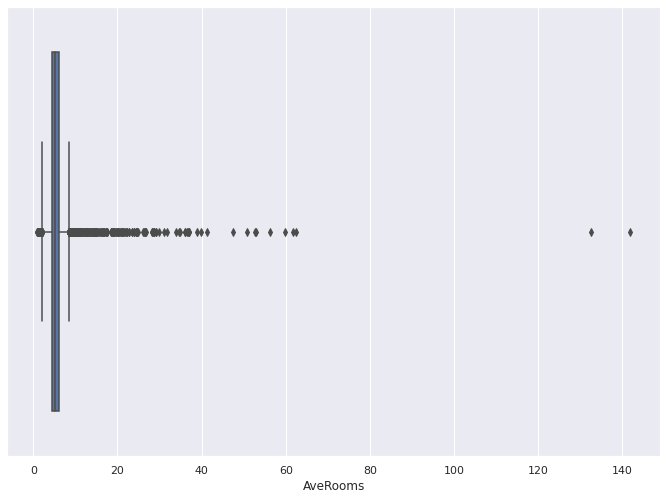

In [ ]:
get_boxplot(data_new, columns=['AveRooms'])

видим выбросы по комнатам, удалим их

In [ ]:
data_new[data_new['AveRooms'] > 80]

,MedInc,HouseAge,AveRooms,Population,AveOccup,MedHouseVal
1914,1.875,33.0,141.909091,30.0,2.727273,5.00001
1979,4.625,34.0,132.533333,36.0,2.400000,1.62500


удаляем выбросы

In [ ]:
data_new = data_new[(data_new['AveRooms'] < 80) | (data_new['AveRooms'].isna())]
data_new[data_new['AveRooms'] > 80]

,MedInc,HouseAge,AveRooms,Population,AveOccup,MedHouseVal


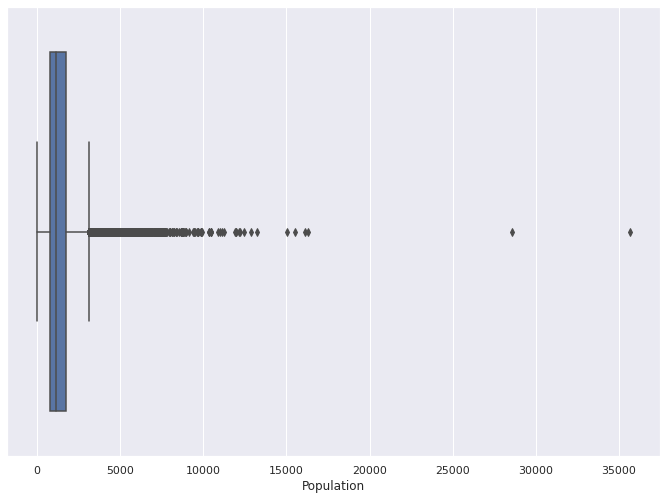

In [ ]:
get_boxplot(data_new, columns=['Population'])

также есть выброс по населению

In [ ]:
data_new[data_new['Population'] > 25000]

,MedInc,HouseAge,AveRooms,Population,AveOccup,MedHouseVal
9880,2.3087,11.0,5.364518,28566.0,4.696810,1.188
15360,2.5729,14.0,5.270497,35682.0,7.482072,1.344


In [ ]:
#удаляем выбросы
data_new = data_new[(data_new['Population'] < 25000) | (data_new['Population'].isna())]
data_new[data_new['Population'] > 25000]

,MedInc,HouseAge,AveRooms,Population,AveOccup,MedHouseVal


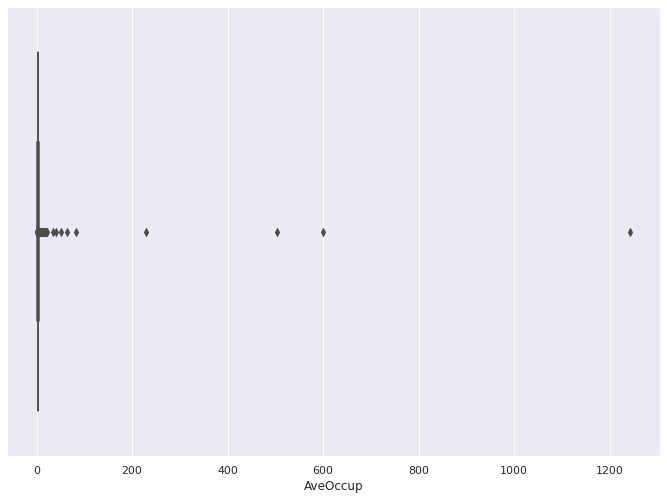

In [ ]:
get_boxplot(data_new, columns=['AveOccup'])

также есть выбросы по среднему кол-ву членов домохозяйства

In [ ]:
data_new[data_new['AveOccup'] > 200]

,MedInc,HouseAge,AveRooms,Population,AveOccup,MedHouseVal
3364,5.5179,36.0,5.142857,4198.0,599.714286,0.675
13034,6.1359,52.0,8.275862,6675.0,230.172414,2.250
16669,4.2639,46.0,9.076923,6532.0,502.461538,3.500
19006,10.2264,45.0,3.166667,7460.0,1243.333333,1.375


In [ ]:
#удаляем выбросы
data_new = data_new[(data_new['AveOccup'] < 200) | (data_new['AveOccup'].isna())]
data_new[data_new['AveOccup'] > 200]

,MedInc,HouseAge,AveRooms,Population,AveOccup,MedHouseVal


#### повторное обучение и метрики после удаления выбросов

In [ ]:
X = data_new[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup']]
y = data_new['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.539248172480742

In [ ]:
model.score(X_test, y_test)

0.5291859483760348

In [ ]:
predict = model.predict(X_test)

In [ ]:
rmse_ejection = np.sqrt(mean_squared_error(y_test, predict))
rmse_ejection

0.7934025739187939

In [ ]:
r2_ejection = r2_score(y_test, predict)
r2_ejection

0.5291859483760348

ВЫВОД: после удаления выбросов модель стала работать идеально, метрики улучшились

### 8.Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
* a. Повторите п. 3, п. 4 на измененных данных.

In [ ]:
data_new

,MedInc,HouseAge,AveRooms,Population,AveOccup,MedHouseVal
0,8.3252,41.0,6.984127,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,565.0,2.181467,3.422
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,845.0,2.560606,0.781
20636,2.5568,18.0,6.114035,356.0,3.122807,0.771
20637,1.7000,17.0,5.205543,1007.0,2.325635,0.923
20638,1.8672,18.0,5.329513,741.0,2.123209,0.847


In [ ]:
#прологарифмируем признак HouseAge для нормализации данных

In [ ]:
data_new.AveRooms = np.log(data_new.AveRooms)

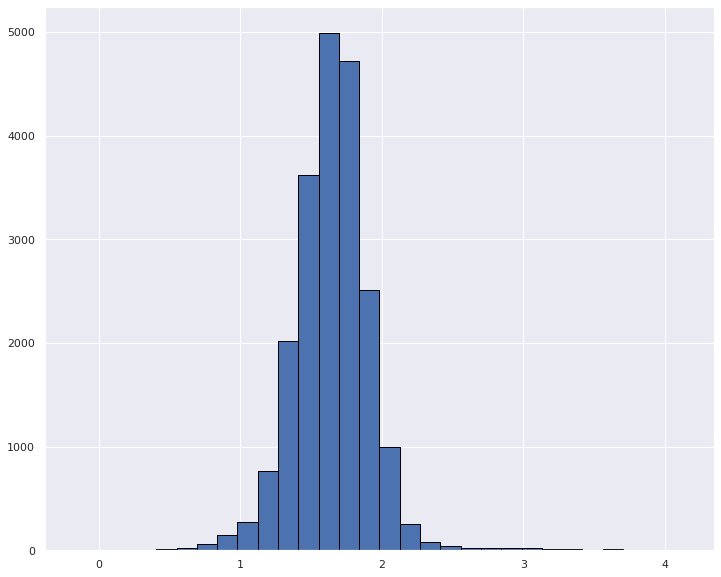

In [ ]:
data_new.AveRooms.hist(figsize=(12, 10), bins=30, edgecolor="black")

In [ ]:
#прологарифмируем признак Population  для нормализации данных
data_new.Population = np.log(data_new.Population)

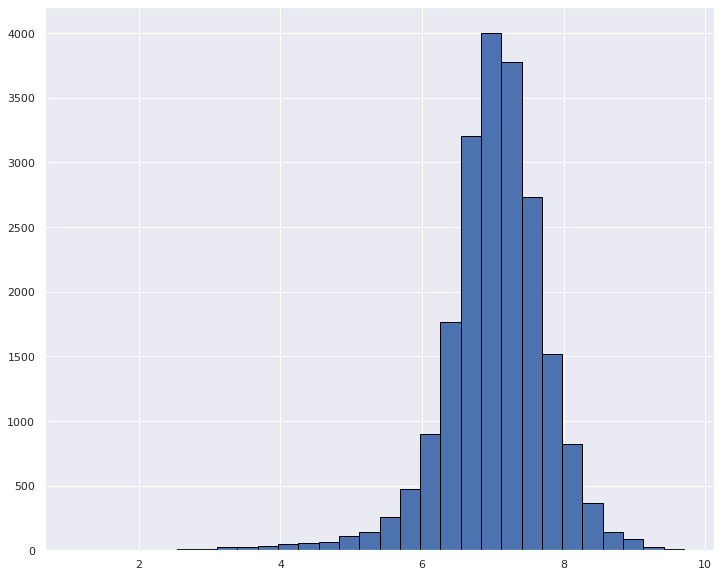

In [ ]:
data_new.Population.hist(figsize=(12, 10), bins=30, edgecolor="black")

In [ ]:
# извлечем квадратный корень из среднего заработка
data_new.MedInc = np.sqrt(data_new.MedInc)

#### повтор обучения после применения математических действий

In [ ]:
X = data_new[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup']]
y = data_new['MedHouseVal']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_train, y_train)

0.5482414788769974

In [ ]:
model.score(X_test, y_test)

0.5402525212898343

In [ ]:
predict = model.predict(X_test)

In [ ]:
rmse_math = np.sqrt(mean_squared_error(y_test, predict))
rmse_math

0.7840225881447006

In [ ]:
r2_math = r2_score(y_test, predict)
r2_math

0.5402525212898343

ВЫВОД: математические преобразования ничего не изменили, уже на этапе удаления выбросов модель достигла высшего скора

### 9.Сформулируйте выводы по проделанной работе.


a. Кратко опишите какие преобразования были сделаны с данными.


b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.


c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.


ВЫВОДЫ:

Для улучшения качества работы моделей нужно анализировать данных, помимо обнаружения и замены пропусков требуется посмотреть на взаимную зависимость признаков и выбросы. В данном случае удаление выбросов привело к тому, что модель стала работать идеально.


In [ ]:
df = pd.DataFrame(columns = ['model', 'rmse', 'r2'])
df

,model,rmse,r2


In [ ]:
df = df.append({
'model' : 'lr_start',
'rmse' : rmse_start,
'r2': r2_start
}, ignore_index=True)

df = df.append({
'model' : 'lr_corr',
'rmse' : rmse_corr,
'r2': r2_corr
}, ignore_index=True)

df = df.append({
'model' : 'lr_ejection',
'rmse' : rmse_ejection,
'r2': r2_ejection
}, ignore_index=True)

df = df.append({
'model' : 'lr_math',
'rmse' : rmse_math,
'r2': r2_math
}, ignore_index=True)

df


,model,rmse,r2
0,lr_start,0.745581,0.575788
1,lr_corr,0.810023,0.499288
2,lr_ejection,0.793403,0.529186
3,lr_math,0.784023,0.540253


В данном случае лучше всего сработала работа с выбросами, считаю, что с задачей справилась в полной мере